[Reference](https://abiyevanar.medium.com/complete-exploratory-data-analysis-guide-with-python-plotly-259174e58885)

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anarabiyev/CarPricePrediction/main/CarPrice_Assignment.csv')

df.drop('car_ID', axis = 1, inplace = True)

df['CarName'] = df['CarName'].str.split().str[0]

df.loc[df['CarName'] == 'maxda', 'CarName'] = 'mazda'
df.loc[df['CarName'] == 'Nissan', 'CarName'] = 'nissan'
df.loc[df['CarName'] == 'porcshce', 'CarName'] = 'porsche'
df.loc[df['CarName'] == 'toyouta', 'CarName'] = 'toyota'
df.loc[df['CarName'] == 'vokswagen', 'CarName'] = 'volkswagen'
df.loc[df['CarName'] == 'vw', 'CarName'] = 'volkswagen'

df['symboling'] = df['symboling'].astype(str)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [3]:
df.isnull().sum().sum()

0

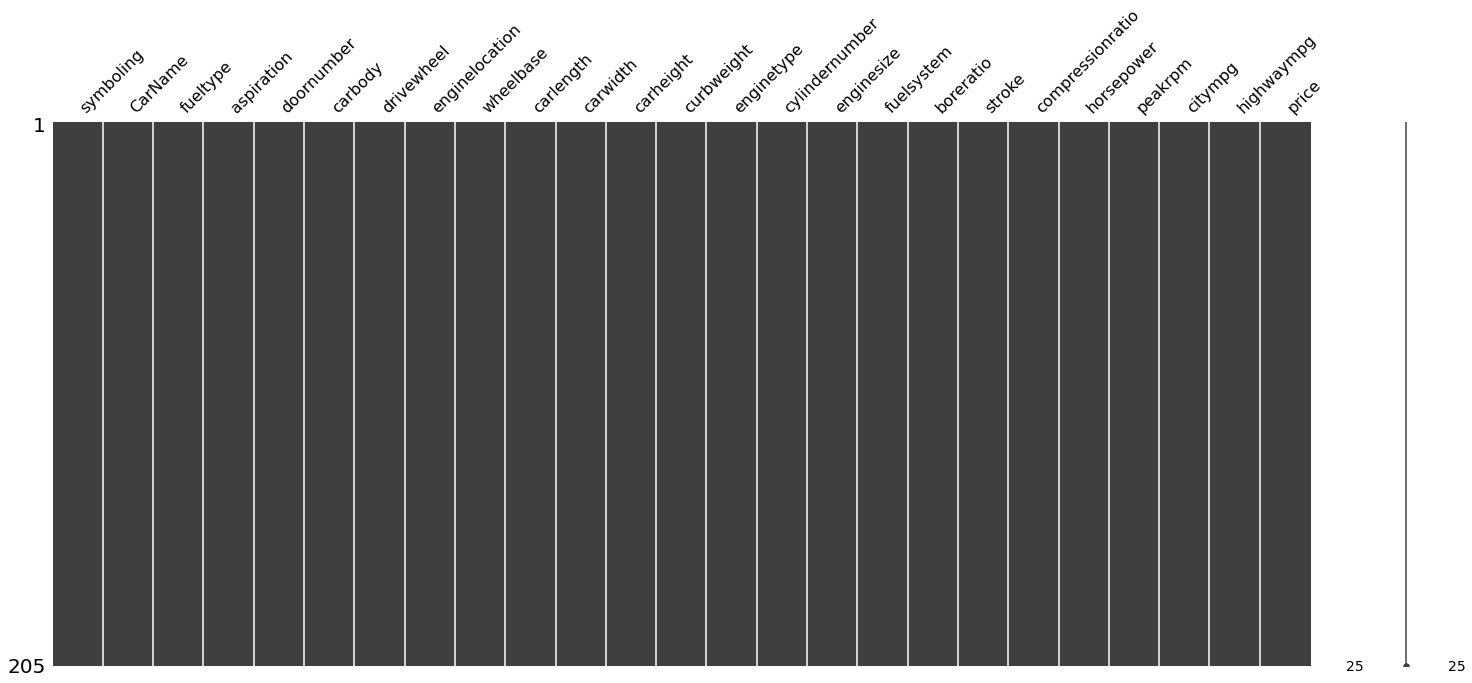

In [4]:
import missingno as msno
msno.matrix(df)

In [5]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
!pip install plotly

In [7]:
import plotly.graph_objects as go
import plotly.express as px

# Distribution of target variable


In [8]:
fig = px.histogram(df, x = 'price')
fig.show()

# Count plot of categorical columns

In [9]:
df_categorical = df.select_dtypes(include = 'object').columns

for i in df_categorical:
    fig = px.histogram(df, x = i,  color_discrete_sequence=['indianred'])
    fig.show()

# Distribution of numerical columns

In [10]:
df_numerical = df.select_dtypes(exclude = 'object').columns

for i in df_numerical:
    fig = px.histogram(df, x = i)
    fig.show()

# Boxplot for outlier check

In [11]:
for i in df_numerical:
    fig = px.box(df, y=i)
    fig.show()

# Variance of target with categorical columns

In [12]:
for i in df_categorical:
    fig = px.box(df, y = 'price', color = i)
    fig.show()

# Pairplot

In [13]:
#1
fig = px.scatter_matrix(df[df_numerical], 
                        dimensions=["carlength", "carwidth", "carheight", "curbweight", "price"],
                        color_discrete_sequence=['dodgerblue'])
fig.show()

#2
fig = px.scatter_matrix(df[df_numerical], 
                        dimensions=['enginesize', 'horsepower', 'citympg', 'highwaympg', "price"], 
                        color_discrete_sequence=['indianred'])
fig.show()

#3
fig = px.scatter_matrix(df[df_numerical], 
                        dimensions=['boreratio', 'stroke', 'compressionratio', "price"], 
                        color_discrete_sequence=['olive'])
fig.show()

# Correlation heatmap

In [14]:
fig = px.imshow(df.corr())
fig.show()